Notons $\nu$ la mesure image de $\mu$ par T .  
Par définition de la mesure image on a :   
$\forall f \quad \nu-intégrable  : \quad  \int_{\mathbb{R}} f \, d\nu = \int_{\mathbb{R}} (f \circ T) \, d\mu
= \int_{\mathbb{R}} f(x^2) \cdot \frac{1}{\sqrt{2\pi}} \exp(\frac{-x^2}{2}) dx 
=\int_{\mathbb{R}^+} f(x^2) \cdot \frac{1}{\sqrt{2\pi}} \exp(\frac{-x^2}{2}) dx + \int_{\mathbb{R}^-} f(x^2) \cdot \frac{1}{\sqrt{2\pi}} \exp(\frac{-x^2}{2}) dx
\stackrel{Parité}{=}2\int_{\mathbb{R}^+} f(x^2) \cdot \frac{1}{\sqrt{2\pi}} \exp(\frac{-x^2}{2}) dx 
\stackrel{Chgt.var}{=}\int_{\mathbb{R}^+} f(x) \cdot \frac{1}{\sqrt{2\pi x}} \exp(\frac{-x}{2}) dx
$ 

  
Ainsi : $\nu$ est la loi de densité $x \mapsto \frac{1}{\sqrt{2\pi x}} \cdot \exp(\frac{-x}{2}) \mathbf{1}_{\mathbb{R}^+}(x)$    

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
import scipy.stats as sps


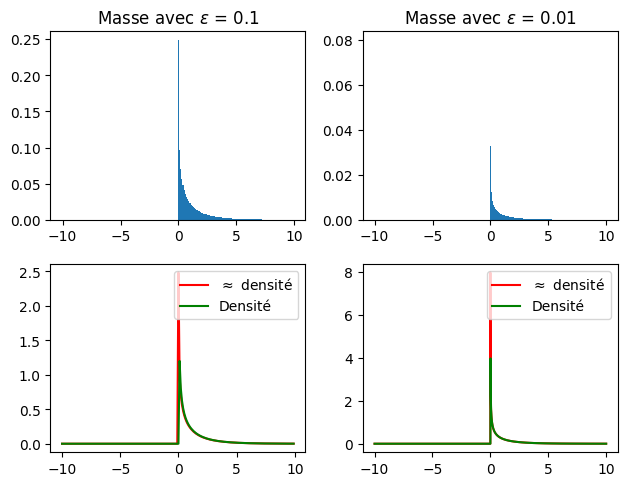

In [8]:
fig,ax=plt.subplots(2,2)
fig.tight_layout()
eps1=0.1
eps2=0.01
seg1=np.arange(-10,10,eps1)
seg2=np.arange(-10,10,eps2)
# Calcul de masse
def mass(a,eps):
    b = a+eps
    if(b<0):
        return 0
    if(a<0):
        a=0
    a=np.sqrt(a)
    b=np.sqrt(b)
    # On multiplie par 2 car il y a deux intervales de même masse
    return 2*(sps.norm.cdf(b)-sps.norm.cdf(a))  
res1 = np.array([mass(i,eps1) for i in seg1])
res2 = np.array([mass(i,eps2) for i in seg2])

dens1 = [i/eps1 for i in res1]
dens2 = [i/eps2 for i in res2]

def funcTheorique(x):
    if(x<=0):
        return 0
    return 1/np.sqrt(2*np.pi*x)*np.exp(-x/2)

theo1 = [funcTheorique(i) for i in seg1]
theo2 = [funcTheorique(i) for i in seg2]
#ax1=plt.subplot(11)
#ax2=plt.subplot(12)
ax[0,0].bar(seg1,res1,width=eps1)
ax[0,0].title.set_text("Masse avec $\epsilon$ = 0.1")
ax[1,0].plot(seg1,dens1,color='red',label=r"$\approx$ densité")
ax[1,0].plot(seg1,theo1,color='green',label=r"Densité")
#plt.ylim([0,0.03])
ax[0,1].bar(seg2,res2,width=eps2)
ax[0,1].title.set_text("Masse avec $\epsilon$ = 0.01")
ax[1,1].plot(seg2,dens2,color='red',label=r"$\approx$ densité")
ax[1,1].plot(seg2,theo2,color='green',label=r"Densité")

ax[1,0].legend(loc="best")
ax[1,1].legend(loc="best")
  

Posons $T(x):= x+1$  
Pour $A$ mesurable on a :
$$
\begin{align*}
\nu(A) &= \delta_0(T^{-1}(A)) \\
&= \begin{cases}
1 & \text{si } 1 \in A \\
0 & \text{sinon}
\end{cases} \\
&= \delta_1(A)
\end{align*}
$$
Ainsi , $$\nu = \delta_1$$  
L'interpolation par déplacement donne :
$\forall t \in [0,1] \quad \mu_t = T_t \# \mu $  
Donc pour $A$ mesurable on a :
$$
\begin{align*}
\mu_t(A) &= \delta_0(A - t) &\text{car} && T^{-1}(x):=x -t \\
&= \begin{cases}
1 & \text{si } t \in A \\
0 & \text{sinon}
\end{cases} \\
&= \delta_t(A)
\end{align*}
$$  

Comparaison avec \mu tilde§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§

 

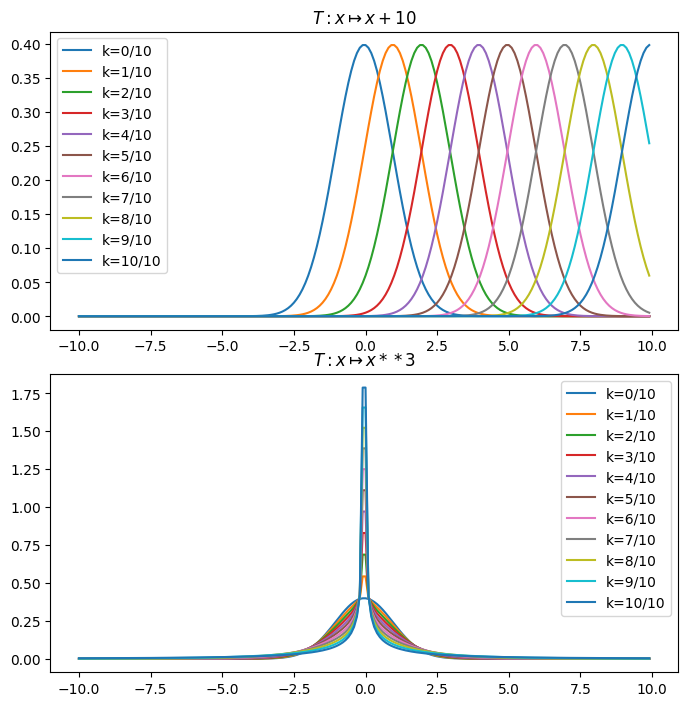

In [4]:
eps=0.1

seg = np.arange(-10,10,eps)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(7,7))
fig.tight_layout()

def fonctionInverse1(x):
    return x-10
def fonctionInverse2(x):
    if(x<0):
        return -(-x)**(1/3)
    return x**(1/3)

def mass(a,b,inv):
    a = inv(a)
    b = inv(b)
    return (sps.norm.cdf(b)-sps.norm.cdf(a)) 

def Tt(x,t,T):
    return (1-t)*x+t*T(x)

for k in range(0,11):
    res = [mass(i,i+eps,lambda x:Tt(x,k/10,fonctionInverse1))/eps for i in seg]
    ax1.plot(seg,res,label="k="+str(k)+"/10")
ax1.title.set_text("$T : x \mapsto x+10$")

for k in range(0,11):
    res = [mass(i,i+eps,lambda x:Tt(x,k/10,fonctionInverse2))/eps for i in seg]
    ax2.plot(seg,res,label="k="+str(k)+"/10")
ax2.title.set_text("$T : x \mapsto x**3$")
ax1.legend()
ax2.legend()
plt.show()



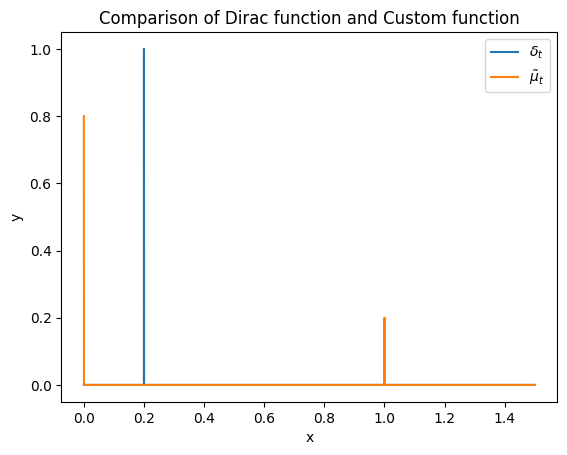

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def dirac(t, x):
    return 1 if x == t else 0

def mutilde(t, x):
    if x==0 : return 1-t 
    if x==1 : return t
    return 0


# Set the value of t
t = 0.2
# Define the range of x values
x_values = np.arange(0,1.5,t/1000)

# Calculate the y values for the Dirac function
y_dirac = [dirac(t, x) for x in x_values]

# Calculate the y values for the custom function
y_custom = [mutilde(t, x) for x in x_values]

# Plot the functions
plt.plot(x_values, y_dirac, label='$\delta_t$')
plt.plot(x_values, y_custom, label=r'$\tilde{\mu}_t$')

# Set the axis labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Dirac function and Custom function')

# Add a legend
plt.legend()

# Display the plot
plt.show()
